In [ ]:
!pip install xgboost imbalanced-learn scikit-learn pandas

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Load data
df = pd.read_csv("/content/drive/MyDrive/combined_incense_dataset.csv")
y = df['Recommend_To_Others']
X = df.drop(columns=["Recommend_To_Others"])

In [ ]:
# Define categorical columns
cat_features = X.columns.tolist()

In [ ]:
# Preprocessing
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(drop='first', handle_unknown='ignore'), cat_features)
], remainder='passthrough')


In [ ]:
# SMOTE + XGBoost pipeline
model_pipeline = ImbPipeline(steps=[
    ('pre', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', XGBClassifier(
        objective='multi:softprob',
        num_class=len(y.unique()),
        eval_metric='mlogloss',
        use_label_encoder=False,
        learning_rate=0.1,
        max_depth=6,
        n_estimators=300,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ))
])

In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:
# Train/test split
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# Train model
model_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:22:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Age_Group', 'Gender',
                                                   'Region', 'Frequency_Usage',
                                                   'Eco_Concern_Level',
                                                   'Awareness_Recycled_Incense',
                                                   'Likes_Fragrance',
                                                   'Prefers_Traditional_Scents',
                                                   'Influenced_By_Branding',
                                                   'Seen_Ads',
                                                   'Buys_Sustainably'])])),
                ('smote...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=None, num_class=8,
                               num_parallel_tree=None, ...))])

In [ ]:
# Predict & evaluate
y_pred = model_pipeline.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.823076923076923

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50        14
           1       0.00      0.00      0.00         5
           2       0.20      0.75      0.32         4
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3
           5       0.94      1.00      0.97        51
           6       1.00      0.70      0.82        10
           7       1.00      1.00      1.00        39

    accuracy                           0.82       130
   macro avg       0.46      0.49      0.45       130
weighted avg       0.81      0.82      0.81       130



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Example tuning params (for grid search)
param_grid = {
    'clf__n_estimators': [200, 300],
    'clf__max_depth': [4, 6],
    'clf__learning_rate': [0.05, 0.1]
}

In [ ]:
grid = GridSearchCV(model_pipeline, param_grid, cv=3, scoring='accuracy', verbose=2)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:24:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:24:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END clf__learning_rate=0.05, clf__max_depth=4, clf__n_estimators=200; total time=   0.8s


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:24:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END clf__learning_rate=0.05, clf__max_depth=4, clf__n_estimators=200; total time=   0.7s
[CV] END clf__learning_rate=0.05, clf__max_depth=4, clf__n_estimators=200; total time=   0.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:24:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END clf__learning_rate=0.05, clf__max_depth=4, clf__n_estimators=300; total time=   8.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:24:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:24:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END clf__learning_rate=0.05, clf__max_depth=4, clf__n_estimators=300; total time=   3.4s
[CV] END clf__learning_rate=0.05, clf__max_depth=4, clf__n_estimators=300; total time=   1.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:24:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:24:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END clf__learning_rate=0.05, clf__max_depth=6, clf__n_estimators=200; total time=   1.0s


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:24:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END clf__learning_rate=0.05, clf__max_depth=6, clf__n_estimators=200; total time=   0.9s
[CV] END clf__learning_rate=0.05, clf__max_depth=6, clf__n_estimators=200; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:24:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:24:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END clf__learning_rate=0.05, clf__max_depth=6, clf__n_estimators=300; total time=   3.3s


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:24:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END clf__learning_rate=0.05, clf__max_depth=6, clf__n_estimators=300; total time=   1.3s
[CV] END clf__learning_rate=0.05, clf__max_depth=6, clf__n_estimators=300; total time=   1.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:24:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:24:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200; total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:24:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200; total time=   0.7s
[CV] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200; total time=   0.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:24:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:24:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300; total time=   1.5s


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:24:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300; total time=   0.9s
[CV] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:24:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:24:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END clf__learning_rate=0.1, clf__max_depth=6, clf__n_estimators=200; total time=   1.0s


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END clf__learning_rate=0.1, clf__max_depth=6, clf__n_estimators=200; total time=   2.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:24:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END clf__learning_rate=0.1, clf__max_depth=6, clf__n_estimators=200; total time=   2.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:24:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:24:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END clf__learning_rate=0.1, clf__max_depth=6, clf__n_estimators=300; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:24:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END clf__learning_rate=0.1, clf__max_depth=6, clf__n_estimators=300; total time=   1.2s
[CV] END clf__learning_rate=0.1, clf__max_depth=6, clf__n_estimators=300; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:24:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['Age_Group',
                                                                          'Gender',
                                                                          'Region',
                                                                          'Frequency_Usage',
                                                                          'Eco_Concern_Level',
                                                                          'Awareness_Recycled_Incense',
                                                                          'Likes_Fragrance',
                                                                          'Prefers_Traditional_Scents',
                                                                          'Influenced_By_Branding',
                                                                          'Seen_Ads',
                                                                          'Bu...
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=6,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=300,
                                                      n_jobs=None, num_class=8,
                                                      num_parallel_tree=None, ...))]),
             param_grid={'clf__learning_rate': [0.05, 0.1],
                         'clf__max_depth': [4, 6],
                         'clf__n_estimators': [200, 300]},
             scoring='accuracy', verbose=2)

In [ ]:
print("Best Accuracy:", grid.best_score_)
print("Best Params:", grid.best_params_)

Best Accuracy: 0.8339606577945066
Best Params: {'clf__learning_rate': 0.1, 'clf__max_depth': 4, 'clf__n_estimators': 300}


In [ ]:
!pip install imbalanced-learn xgboost

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from xgboost import XGBClassifier

In [ ]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/cleaned_combined_incense_dataset.csv")
df = df.dropna()

In [ ]:
# Define features and target
X = df.drop(columns=["Recommend_To_Others"])
y = df["Recommend_To_Others"]

In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:
# Categorical preprocessing
cat_features = X.columns.tolist()
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(drop="first", handle_unknown='ignore'), cat_features)
])


In [ ]:
# SMOTE + XGBoost pipeline
pipeline = ImbPipeline(steps=[
    ("pre", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("clf", XGBClassifier(
        objective="multi:softprob",
        num_class=3,
        eval_metric="mlogloss",
        use_label_encoder=False,
        learning_rate=0.1,
        max_depth=4,
        n_estimators=300,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ))
])

In [ ]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/cleaned_combined_incense_dataset.csv")
df = df.dropna()

# Define features and target
X = df.drop(columns=["Recommend_To_Others"])
y = df["Recommend_To_Others"]

# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


# Train/test split
# Use y_encoded instead of y for the split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# Categorical preprocessing
cat_features = X.columns.tolist()
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(drop="first", handle_unknown='ignore'), cat_features)
])

# SMOTE + XGBoost pipeline
from imblearn.pipeline import Pipeline as ImbPipeline # Ensure ImbPipeline is imported if not already
from imblearn.over_sampling import SMOTE # Ensure SMOTE is imported if not already
from xgboost import XGBClassifier # Ensure XGBClassifier is imported if not already

pipeline = ImbPipeline(steps=[
    ("pre", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("clf", XGBClassifier(
        objective="multi:softprob",
        # Make sure num_class is set based on the unique encoded labels
        num_class=len(label_encoder.classes_),
        eval_metric="mlogloss",
        use_label_encoder=False,
        learning_rate=0.1,
        max_depth=4,
        n_estimators=300,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ))
])

# Fit and evaluate
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# You will need to decode the predictions back to original labels for meaningful interpretation
y_pred_decoded = label_encoder.inverse_transform(y_pred)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
# For classification report, you might want to use the decoded predictions and original test labels,
# or convert y_test back to original labels as well, depending on how you want to view the report.
# For simplicity here, we'll use the encoded y_test with encoded y_pred.
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Accuracy: 1.0

📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        39

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [ ]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/cleaned_combined_incense_dataset.csv")
df = df.dropna()

In [ ]:
# Define features and target
X = df.drop(columns=["Recommend_To_Others"])
y = df["Recommend_To_Others"]

In [ ]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
# Train/test split
# Use y_encoded instead of y for the split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)


In [ ]:
# Categorical preprocessing
cat_features = X.columns.tolist()
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(drop="first", handle_unknown='ignore'), cat_features)
])

In [ ]:
# SMOTE + XGBoost pipeline
from imblearn.pipeline import Pipeline as ImbPipeline # Ensure ImbPipeline is imported if not already
from imblearn.over_sampling import SMOTE # Ensure SMOTE is imported if not already
from xgboost import XGBClassifier # Ensure XGBClassifier is imported if not already

In [ ]:
pipeline = ImbPipeline(steps=[
    ("pre", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("clf", XGBClassifier(
        objective="multi:softprob",
        # Make sure num_class is set based on the unique encoded labels
        num_class=len(label_encoder.classes_),
        eval_metric="mlogloss",
        use_label_encoder=False,
        learning_rate=0.1,
        max_depth=4,
        n_estimators=300,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ))
])

In [ ]:
# Fit and evaluate
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:36:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END clf__learning_rate=0.05, clf__max_depth=4, clf__n_estimators=200; total time=   2.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END clf__learning_rate=0.05, clf__max_depth=4, clf__n_estimators=200; total time=   0.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END clf__learning_rate=0.05, clf__max_depth=4, clf__n_estimators=200; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END clf__learning_rate=0.05, clf__max_depth=4, clf__n_estimators=300; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END clf__learning_rate=0.05, clf__max_depth=4, clf__n_estimators=300; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END clf__learning_rate=0.05, clf__max_depth=4, clf__n_estimators=300; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END clf__learning_rate=0.05, clf__max_depth=6, clf__n_estimators=200; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END clf__learning_rate=0.05, clf__max_depth=6, clf__n_estimators=200; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END clf__learning_rate=0.05, clf__max_depth=6, clf__n_estimators=200; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END clf__learning_rate=0.05, clf__max_depth=6, clf__n_estimators=300; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END clf__learning_rate=0.05, clf__max_depth=6, clf__n_estimators=300; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END clf__learning_rate=0.05, clf__max_depth=6, clf__n_estimators=300; total time=   0.3s
[CV] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200; total time=   0.2s
[CV] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END clf__learning_rate=0.1, clf__max_depth=6, clf__n_estimators=200; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END clf__learning_rate=0.1, clf__max_depth=6, clf__n_estimators=200; total time=   0.2s
[CV] END clf__learning_rate=0.1, clf__max_depth=6, clf__n_estimators=200; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END clf__learning_rate=0.1, clf__max_depth=6, clf__n_estimators=300; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END clf__learning_rate=0.1, clf__max_depth=6, clf__n_estimators=300; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END clf__learning_rate=0.1, clf__max_depth=6, clf__n_estimators=300; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['Age_Group',
                                                                          'Gender',
                                                                          'Region',
                                                                          'Frequency_Usage',
                                                                          'Eco_Concern_Level',
                                                                          'Awareness_Recycled_Incense',
                                                                          'Likes_Fragrance',
                                                                          'Prefers_Traditional_Scents',
                                                                          'Influenced_By_Branding',
                                                                          'Seen_Ads',
                                                                          'Bu...
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=6,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=300,
                                                      n_jobs=None, num_class=8,
                                                      num_parallel_tree=None, ...))]),
             param_grid={'clf__learning_rate': [0.05, 0.1],
                         'clf__max_depth': [4, 6],
                         'clf__n_estimators': [200, 300]},
             scoring='accuracy', verbose=2)

In [ ]:
# You will need to decode the predictions back to original labels for meaningful interpretation
y_pred_decoded = label_encoder.inverse_transform(y_pred)

In [ ]:
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 1.0

📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        39

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [ ]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/updated_combined_incense_dataset.csv")
df = df.dropna()

In [ ]:
eco_map = {'High': 2, 'Medium': 1, 'Low': 0}
yes_no_map = {'Yes': 1, 'No': 0}

df['Eco_Score'] = df['Eco_Concern_Level'].map(eco_map)
df['Recycle_Score'] = df['Awareness_Recycled_Incense'].map(yes_no_map)
df['Sustainable_Buyer_Score'] = df['Buys_Sustainably'].map(yes_no_map)

df['Sustainability_Score'] = df['Eco_Score'] + df['Recycle_Score'] + df['Sustainable_Buyer_Score']
df['Branding_Num'] = df['Influenced_By_Branding'].map(yes_no_map)
df['Fragrance_Num'] = df['Likes_Fragrance'].map(yes_no_map)
df['Recommend_Num'] = df['Recommend_To_Others'].map({'No': 0, 'Maybe': 1, 'Yes': 2})


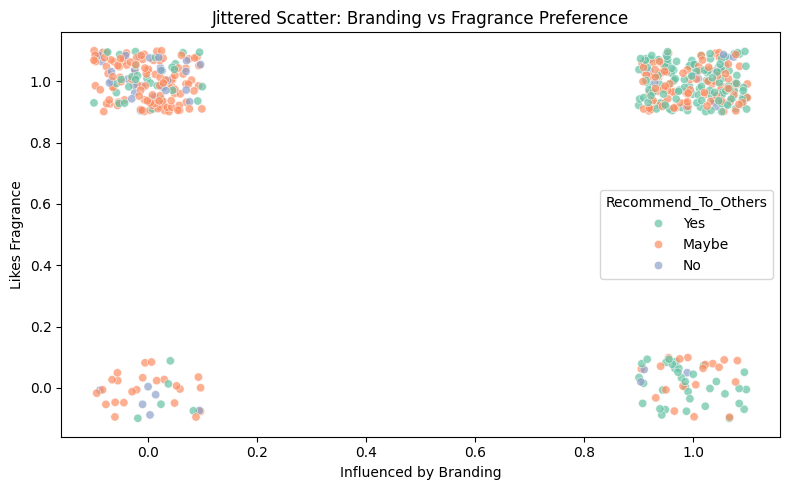

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df['Branding_Jitter'] = df['Branding_Num'] + np.random.uniform(-0.1, 0.1, len(df))
df['Fragrance_Jitter'] = df['Fragrance_Num'] + np.random.uniform(-0.1, 0.1, len(df))

plt.figure(figsize=(8, 5))
sns.scatterplot(x='Branding_Jitter', y='Fragrance_Jitter', hue='Recommend_To_Others', data=df, alpha=0.7, palette='Set2')
plt.title("Jittered Scatter: Branding vs Fragrance Preference")
plt.xlabel("Influenced by Branding")
plt.ylabel("Likes Fragrance")
plt.tight_layout()
plt.show()


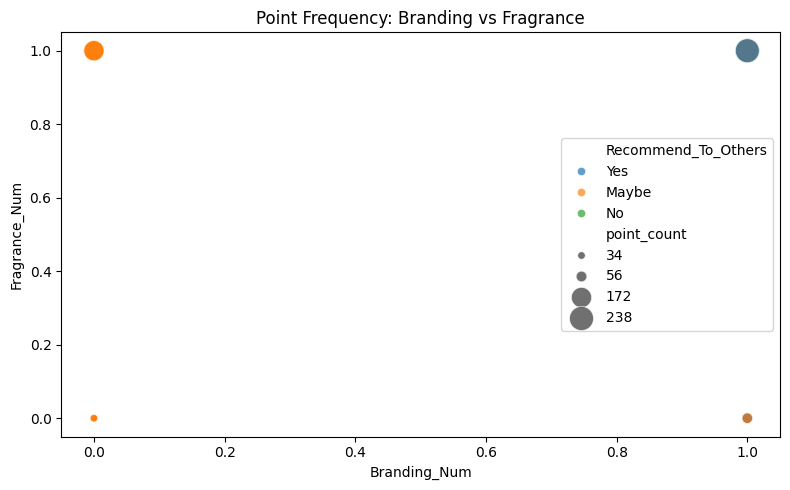

In [ ]:
from collections import Counter

counts = Counter(zip(df['Branding_Num'], df['Fragrance_Num']))
df['point_count'] = [counts[(x, y)] for x, y in zip(df['Branding_Num'], df['Fragrance_Num'])]

plt.figure(figsize=(8, 5))
sns.scatterplot(x='Branding_Num', y='Fragrance_Num', size='point_count', sizes=(30, 300),
                hue='Recommend_To_Others', data=df, alpha=0.7)
plt.title("Point Frequency: Branding vs Fragrance")
plt.tight_layout()
plt.show()

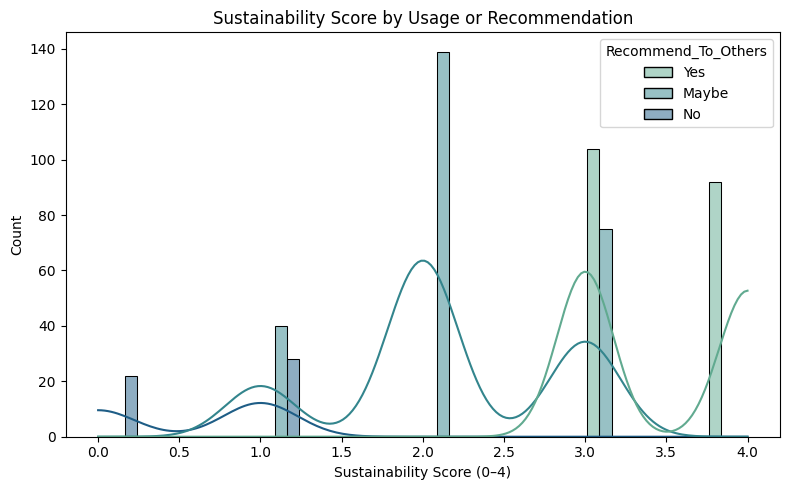

In [ ]:
df_kde = df.dropna(subset=['Sustainability_Score'])

plt.figure(figsize=(8, 5))
sns.histplot(data=df_kde, x='Sustainability_Score', hue='Recommend_To_Others',
             multiple='dodge', shrink=0.9, kde=True, palette='crest', edgecolor='black')
plt.title("Sustainability Score by Usage or Recommendation")
plt.xlabel("Sustainability Score (0–4)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()